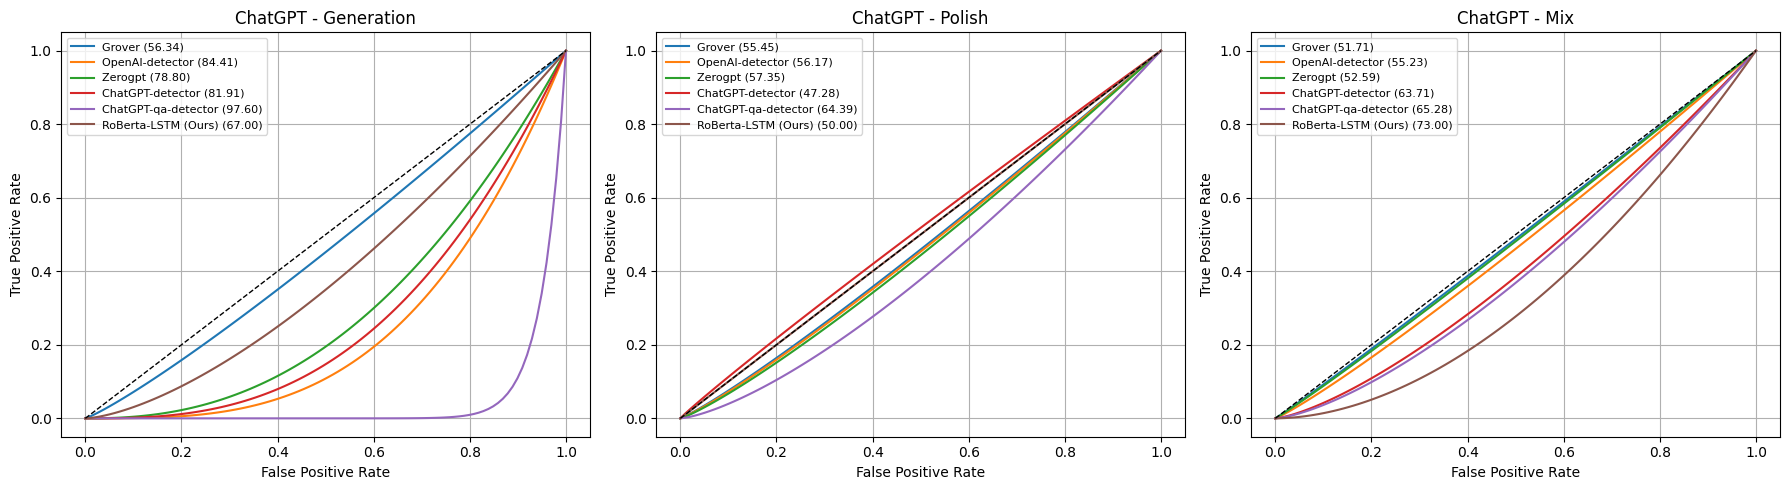

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Danh sách phương pháp và AUC cho từng loại
methods = [
    "Grover", 
    "OpenAI-detector", 
    "Zerogpt", 
    "ChatGPT-detector", 
    "ChatGPT-qa-detector", 
    "RoBerta-LSTM (Ours)"
]

auc_generation = [56.34, 84.41, 78.8, 81.91, 97.6, 67.0]
auc_polish = [55.45, 56.17, 57.35, 47.28, 64.39, 50.0]
auc_mix = [51.71, 55.23, 52.59, 63.71, 65.28, 73.0]

def plot_fake_roc(ax, aucs, title):
    fpr = np.linspace(0, 1, 100)
    for i, auc in enumerate(aucs):
        # Giả định đường cong ROC là fpr^exp để tạo ra AUC tương đương (xấp xỉ)
        exp = 1 / (2 * (1 - auc/100 + 1e-6))  # dùng AUC để điều chỉnh độ cong
        tpr = fpr ** exp
        ax.plot(fpr, tpr, label=f"{methods[i]} ({auc:.2f})")
    ax.plot([0, 1], [0, 1], 'k--', lw=1)  # baseline
    ax.set_title(title)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(fontsize=8)
    ax.grid(True)

# Tạo các biểu đồ ROC riêng biệt
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_fake_roc(axes[0], auc_generation, "ChatGPT - Generation")
plot_fake_roc(axes[1], auc_polish, "ChatGPT - Polish")
plot_fake_roc(axes[2], auc_mix, "ChatGPT - Mix")

plt.tight_layout()
plt.show()
